In [1]:

import logging
from dataclasses import dataclass
from datetime import datetime, timedelta
from pathlib import Path
from typing import Dict, List, Optional, Tuple

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

## Data Preprocessing

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

#APPLE Stock Data
company_list = [AAPL]
company_name = ["APPLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
AAPL_df = pd.concat(company_list, axis=0)
AAPL_df.head(10)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-06-06,193.574707,195.585308,193.266152,194.779081,41181800,APPLE
2024-06-07,195.973495,196.023266,193.236296,193.743917,53103900,APPLE
2024-06-10,192.221039,196.381589,191.255553,195.983442,97262100,APPLE
2024-06-11,206.185730,206.195693,192.728675,192.748571,172373300,APPLE
2024-06-12,212.078186,219.174986,205.936893,206.404707,198134300,APPLE
2024-06-13,213.242752,215.741063,210.615041,213.740425,97862700,APPLE
2024-06-14,211.500885,214.168403,210.316422,212.854555,70122700,APPLE
2024-06-17,215.661423,217.930808,211.729813,212.376781,93728300,APPLE


In [3]:
#GOOGLE Stock Data
company_list = [GOOG]
company_name = ["GOOGLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
GOOG_df = pd.concat(company_list, axis=0)
GOOG_df.head(10)

Price,Close,High,Low,Open,Volume,company_name
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,
2024-06-06,177.509232,177.867535,176.374606,176.593555,14255800,GOOGLE
2024-06-07,175.120544,178.574188,174.961295,177.618722,14716300,GOOGLE
2024-06-10,175.997391,177.830797,173.755449,175.818028,17122200,GOOGLE
2024-06-11,177.551804,177.751084,174.811653,177.083486,14402400,GOOGLE
2024-06-12,178.916901,181.427879,177.143277,179.106223,18600400,GOOGLE
2024-06-13,176.107010,177.870660,176.027295,177.203061,15956900,GOOGLE
2024-06-14,177.731155,178.089867,175.222184,175.222184,12361600,GOOGLE
2024-06-17,178.139694,179.275611,175.857903,176.346138,15272900,GOOGLE


In [4]:
#MICROSOFT Stock Data
company_list = [MSFT]
company_name = ["MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
MSFT_df = pd.concat(company_list, axis=0)
MSFT_df.head(10)

Price,Close,High,Low,Open,Volume,company_name
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,
Date,,,,,,
2024-06-06,421.289978,422.073976,417.379954,420.783879,14861300,MICROSOFT
2024-06-07,420.625092,423.036595,419.781553,422.957217,13621700,MICROSOFT
2024-06-10,424.614502,424.822896,420.664804,421.468638,14003000,MICROSOFT
2024-06-11,429.387909,429.526858,422.014448,422.242709,14551100,MICROSOFT
2024-06-12,437.704163,440.026355,429.953588,432.007845,22366200,MICROSOFT
2024-06-13,438.220154,440.016410,436.026977,437.495728,15960600,MICROSOFT
2024-06-14,439.202667,439.768338,433.397172,434.945300,13582000,MICROSOFT
2024-06-17,444.958496,447.508949,437.366708,439.222475,20790000,MICROSOFT


In [5]:
#AMAZON Stock Data
company_list = [AMZN]
company_name = ["AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
AMZN_df = pd.concat(company_list, axis=0)
AMZN_df.head(10)

Price,Close,High,Low,Open,Volume,company_name
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,
2024-06-06,185.000000,185.000000,181.490005,181.750000,31371200,AMAZON
2024-06-07,184.300003,186.289993,183.360001,184.899994,28021500,AMAZON
2024-06-10,187.059998,187.229996,183.789993,184.070007,34494500,AMAZON
2024-06-11,187.229996,187.770004,184.539993,187.059998,27265100,AMAZON
2024-06-12,186.889999,188.350006,185.429993,188.020004,33984200,AMAZON
2024-06-13,183.830002,187.669998,182.669998,186.089996,39721500,AMAZON
2024-06-14,183.660004,183.720001,182.229996,183.080002,25456400,AMAZON
2024-06-17,184.059998,185.000000,181.220001,182.520004,35601900,AMAZON


In [6]:
#TESLA Stock Data
company_list = [TSLA]
company_name = ["TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
TSLA_df = pd.concat(company_list, axis=0)
TSLA_df.head(10)

Price,Close,High,Low,Open,Volume,company_name
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2024-06-06,177.940002,179.729996,172.729996,174.600006,69887000,TESLA
2024-06-07,177.479996,179.350006,175.580002,176.130005,56244900,TESLA
2024-06-10,173.789993,178.570007,173.169998,176.059998,50869700,TESLA
2024-06-11,170.660004,174.750000,167.410004,173.919998,64761900,TESLA
2024-06-12,177.289993,180.550003,169.800003,171.119995,90389400,TESLA
2024-06-13,182.470001,191.080002,181.229996,188.389999,118984100,TESLA
2024-06-14,178.009995,186.000000,176.919998,185.800003,82038200,TESLA
2024-06-17,187.440002,188.809998,177.000000,177.919998,109786100,TESLA


In [7]:
AAPL_df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,223.114044,225.408659,220.387905,222.735043,5.616412e+07
std,15.146485,14.604283,15.625164,15.342903,3.242889e+07
min,172.194199,190.090729,168.988411,171.724805,2.323470e+07
25%,213.130161,215.233427,210.588762,212.874458,3.964202e+07
50%,224.210571,226.070020,222.231372,224.170648,4.761735e+07
75%,232.515671,234.263584,229.182156,232.447929,6.036088e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


In [8]:
AAPL_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-06-06 to 2025-06-05
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     250 non-null    float64
 1   (High, AAPL)      250 non-null    float64
 2   (Low, AAPL)       250 non-null    float64
 3   (Open, AAPL)      250 non-null    float64
 4   (Volume, AAPL)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [9]:
GOOG_df.describe()


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,173.463984,175.559772,171.575551,173.534879,2.033782e+07
std,13.196148,13.087984,13.214765,13.044803,9.423260e+06
min,146.580002,151.059998,142.660004,143.389999,6.809800e+06
25%,164.147419,166.374053,162.973185,164.415949,1.414402e+07
50%,170.262634,172.121850,168.587494,170.286284,1.754670e+07
75%,182.932808,185.033392,181.868788,183.578196,2.375592e+07
max,207.473633,208.462496,204.027547,204.267279,7.872980e+07


In [10]:
MSFT_df.describe()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,419.593939,423.225885,415.506993,419.341741,2.151672e+07
std,23.563840,22.791059,24.171604,23.505157,8.363758e+06
min,353.910278,363.812108,344.158197,350.237034,7.164500e+06
25%,407.232880,411.130847,404.696757,406.512584,1.652510e+07
50%,419.983261,423.441185,415.159647,419.595106,1.954060e+07
75%,436.358269,439.891348,432.318523,436.153144,2.349160e+07
max,467.679993,469.649994,464.029999,464.959991,6.426370e+07


In [11]:
AMZN_df.describe()


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,198.495080,200.801920,195.867920,198.445760,4.210036e+07
std,18.865725,18.757860,18.962274,18.950059,1.815396e+07
min,161.020004,162.960007,151.610001,154.210007,1.500750e+07
25%,185.002499,187.267498,182.880001,184.899994,3.037310e+07
50%,194.514999,197.160004,192.270004,194.629997,3.795710e+07
75%,210.200001,212.945004,207.529999,210.222500,4.538170e+07
max,242.059998,242.520004,238.029999,239.020004,1.414484e+08


In [12]:
TSLA_df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,286.494160,293.694880,279.058840,286.628560,9.934143e+07
std,74.190512,76.261096,72.278249,74.777678,3.929347e+07
min,170.660004,174.750000,167.410004,171.119995,3.716760e+07
25%,227.592499,232.902500,220.562500,227.742500,7.017200e+07
50%,261.055008,265.604996,252.004997,258.699997,8.929110e+07
75%,344.157494,351.214996,335.915001,345.075005,1.182348e+08
max,479.859985,488.540009,457.510010,475.899994,2.874998e+08


In [13]:
# Combine all dataframes into one
all_data = pd.concat([AAPL_df, GOOG_df, MSFT_df, AMZN_df, TSLA_df], axis=0)
# Reset index to have a clean DataFrame
all_data.reset_index(inplace=True)
# Convert 'Date' to datetime if not already
all_data['Date'] = pd.to_datetime(all_data['Date'])
# Sort by date
all_data.sort_values(by='Date', inplace=True)
# Set 'Date' as index
all_data.set_index('Date', inplace=True)
# Display the combined DataFrame
print(all_data.head())
# Save the combined DataFrame to a CSV file
all_data.to_csv('combined_tech_stocks.csv')

Price            Close        High         Low        Open      Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-06-06  193.574707  195.585308  193.266152  194.779081  41181800.0   
2024-06-06         NaN         NaN         NaN         NaN         NaN   
2024-06-06         NaN         NaN         NaN         NaN         NaN   
2024-06-06         NaN         NaN         NaN         NaN         NaN   
2024-06-06         NaN         NaN         NaN         NaN         NaN   

Price      company_name       Close        High         Low        Open  ...  \
Ticker                         GOOG        GOOG        GOOG        GOOG  ...   
Date                                                                     ...   
2024-06-06        APPLE         NaN         NaN         NaN         NaN  ...   
2024-06-06    MICROSOFT         NaN         NaN         NaN         NaN  ...   
2024-06

In [14]:
combined_data = pd.read_csv('combined_tech_stocks.csv')
combined_data

,Price,Close,High,Low,Open,Volume,company_name,Close.1,High.1,Low.1,...,Close.3,High.3,Low.3,Open.3,Volume.3,Close.4,High.4,Low.4,Open.4,Volume.4
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,NaN,GOOG,GOOG,GOOG,...,AMZN,AMZN,AMZN,AMZN,AMZN,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-06-06,193.57470703125,195.58530834672572,193.2661524862918,194.77908126144504,41181800.0,APPLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-06-06,NaN,NaN,NaN,NaN,NaN,MICROSOFT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-06,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,...,185.0,185.0,181.49000549316406,181.75,31371200.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2025-06-05,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,...,207.91000366210938,212.80999755859375,207.55999755859375,209.5500030517578,51864200.0,NaN,NaN,NaN,NaN,NaN
1248,2025-06-05,NaN,NaN,NaN,NaN,NaN,GOOGLE,169.80999755859375,172.36000061035156,169.35000610351562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1249,2025-06-05,200.6300048828125,204.75,200.14999389648438,203.5,55126100.0,APPLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250,2025-06-05,NaN,NaN,NaN,NaN,NaN,MICROSOFT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


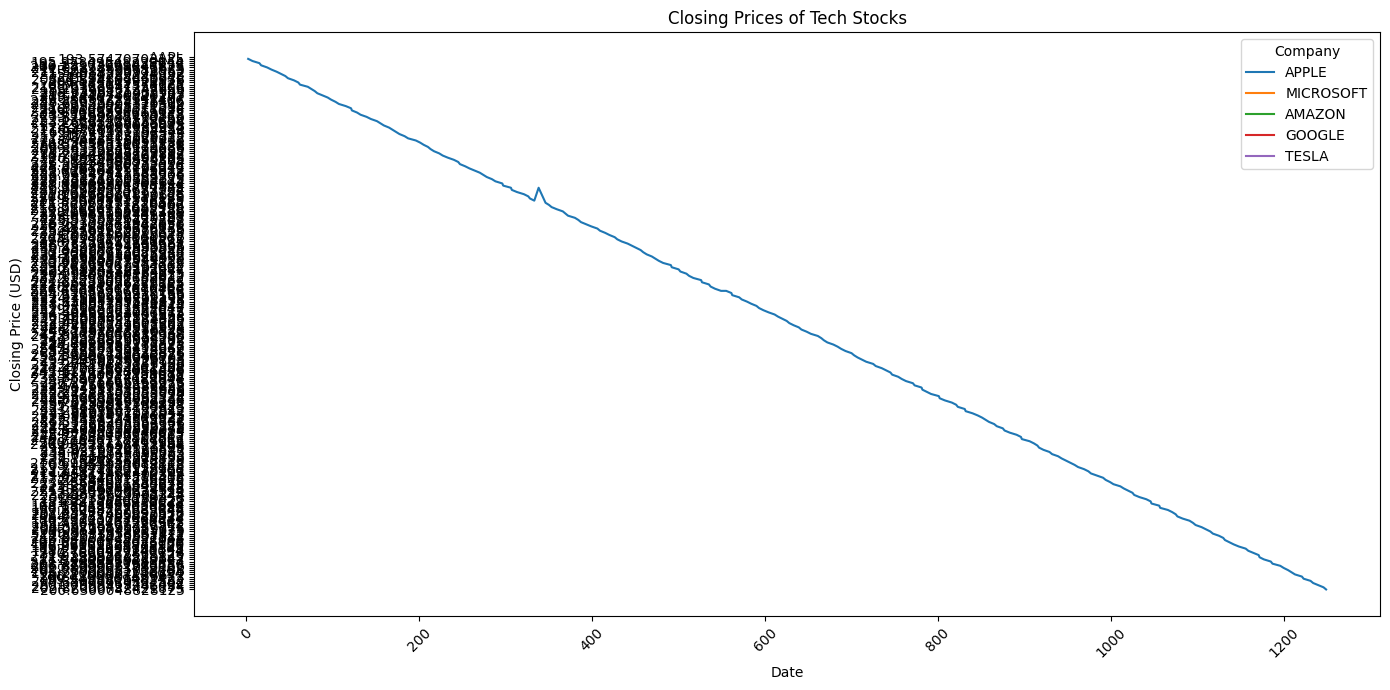

In [15]:
# Plotting the closing prices of all stocks
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data, x=combined_data.index, y='Close', hue='company_name')
plt.title('Closing Prices of Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('tech_stocks_closing_prices.png')
plt.show()

In [16]:
# Display the first few rows of the combined data
print(combined_data.head())
# Display the last few rows of the combined data
print(combined_data.tail())
# Display the summary statistics of the combined data
print(combined_data.describe())
# Display the data types of the combined data
print(combined_data.dtypes)
# Display the shape of the combined data
print(combined_data.shape)
# Display the columns of the combined data
print(combined_data.columns)
# Display the index of the combined data
print(combined_data.index)
# Display the unique company names in the combined data
print(combined_data['company_name'].unique())


        Price            Close                High                Low  \
0      Ticker             AAPL                AAPL               AAPL   
1        Date              NaN                 NaN                NaN   
2  2024-06-06  193.57470703125  195.58530834672572  193.2661524862918   
3  2024-06-06              NaN                 NaN                NaN   
4  2024-06-06              NaN                 NaN                NaN   

                 Open      Volume company_name Close.1 High.1 Low.1  ...  \
0                AAPL        AAPL          NaN    GOOG   GOOG  GOOG  ...   
1                 NaN         NaN          NaN     NaN    NaN   NaN  ...   
2  194.77908126144504  41181800.0        APPLE     NaN    NaN   NaN  ...   
3                 NaN         NaN    MICROSOFT     NaN    NaN   NaN  ...   
4                 NaN         NaN       AMAZON     NaN    NaN   NaN  ...   

  Close.3 High.3               Low.3  Open.3    Volume.3 Close.4 High.4 Low.4  \
0    AMZN   AMZN       

## Modeling

In [17]:

# Configuration for stock prediction analysis
@dataclass
class PredictionConfig:
    """Configuration for stock prediction parameters."""
    
    stocks: List[str]
    training_years: int = 5
    forecast_days: int = 10
    validation_splits: int = 5
    plot_months: int = 4
    output_dir: str = "results"
    log_level: str = "INFO"

# Set up logging
@dataclass
class ModelMetrics:
    """Container for model performance metrics."""
    
    accuracy: float
    r2_score: float
    mape: float
    cv_score_mean: float
    cv_score_std: float



In [18]:
#import logging
class StockDataManager:
    """Handles stock data downloading and preprocessing."""
    
    def __init__(self, logger: logging.Logger):
        self.logger = logger
    
    def download_stock_data(
        self, 
        ticker: str, 
        start_date: datetime, 
        end_date: datetime
    ) -> Optional[pd.DataFrame]:
        """
        Download and preprocess stock data for a given ticker.
        
        Args:
            ticker: Stock ticker symbol
            start_date: Start date for data retrieval
            end_date: End date for data retrieval
            
        Returns:
            DataFrame with processed stock data or None if failed
        """
        try:
            self.logger.info(f"Downloading data for {ticker}")
            
            # Download data with retry logic
            df = yf.download(ticker, start=start_date, end=end_date, progress=False)
            
            if df.empty:
                self.logger.warning(f"No data retrieved for {ticker}")
                return None
            
            # Select and clean data
            df = df[['Close']].copy()
            df.dropna(inplace=True)
            
            if len(df) < 100:  # Minimum data requirement
                self.logger.warning(f"Insufficient data for {ticker}: {len(df)} records")
                return None
            
            self.logger.info(f"Successfully downloaded {len(df)} records for {ticker}")
            return df
            
        except Exception as e:
            self.logger.error(f"Failed to download data for {ticker}: {str(e)}")
            return None
        


In [19]:


class StockPredictor:
    """Handles model training and prediction for stock prices."""
    
    def __init__(self, logger: logging.Logger):
        self.logger = logger
        self.model = LinearRegression()
    
    def prepare_features(
        self, 
        df: pd.DataFrame, 
        forecast_days: int
    ) -> Tuple[np.ndarray, np.ndarray]:
        """
        Prepare features and targets for model training.
        
        Args:
            df: DataFrame with stock data
            forecast_days: Number of days to forecast
            
        Returns:
            Tuple of (features, targets)
        """
        # Create shifted target variable
        df_copy = df.copy()
        df_copy['Target'] = df_copy['Close'].shift(-forecast_days)
        
        # Remove rows with NaN targets
        valid_data = df_copy.dropna()
        
        X = valid_data[['Close']].values
        y = valid_data['Target'].values
        
        return X, y
    
    def train_model(self, X: np.ndarray, y: np.ndarray) -> ModelMetrics:
        """
        Train the prediction model and calculate performance metrics.
        
        Args:
            X: Feature matrix
            y: Target vector
            
        Returns:
            ModelMetrics object with performance statistics
        """
        try:
            # Train the model
            self.model.fit(X, y)
            
            # Make predictions on training data
            y_pred = self.model.predict(X)
            
            # Calculate metrics
            mape = mean_absolute_percentage_error(y, y_pred) * 100
            accuracy = max(0, 100 - mape)  # Ensure non-negative accuracy
            r2 = r2_score(y, y_pred)
            
            # Cross-validation for more robust evaluation
            tscv = TimeSeriesSplit(n_splits=5)
            cv_scores = cross_val_score(
                self.model, X, y, cv=tscv, scoring='neg_mean_absolute_percentage_error'
            )
            cv_score_mean = -cv_scores.mean() * 100
            cv_score_std = cv_scores.std() * 100
            
            return ModelMetrics(
                accuracy=accuracy,
                r2_score=r2,
                mape=mape,
                cv_score_mean=cv_score_mean,
                cv_score_std=cv_score_std
            )
            
        except Exception as e:
            self.logger.error(f"Model training failed: {str(e)}")
            raise
    
    def generate_forecast(
        self, 
        df: pd.DataFrame, 
        forecast_days: int
    ) -> pd.DataFrame:
        """
        Generate price forecasts for the specified number of days.
        
        Args:
            df: DataFrame with stock data
            forecast_days: Number of days to forecast
            
        Returns:
            DataFrame with forecast results
        """
        try:
            # Get the most recent prices for prediction
            recent_prices = df['Close'].tail(forecast_days).values.reshape(-1, 1)
            
            # Generate predictions
            forecast = self.model.predict(recent_prices)
            
            # Create forecast DataFrame
            forecast_dates = pd.date_range(
                start=df.index[-forecast_days],
                periods=forecast_days,
                freq='D'
            )
            
            forecast_df = pd.DataFrame({
                'Predicted_Price': forecast
            }, index=forecast_dates)
            
            return forecast_df
            
        except Exception as e:
            self.logger.error(f"Forecast generation failed: {str(e)}")
            raise

In [20]:
class ResultsVisualizer:
    """Handles visualization and result presentation."""
    
    def __init__(self, logger: logging.Logger, output_dir: str):
        self.logger = logger
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(exist_ok=True)
    
    def plot_predictions(
        self,
        ticker: str,
        df: pd.DataFrame,
        forecast_df: pd.DataFrame,
        metrics: ModelMetrics,
        plot_months: int
    ) -> None:
        """
        Create and save prediction visualization.
        
        Args:
            ticker: Stock ticker symbol
            df: Historical stock data
            forecast_df: Forecast results
            metrics: Model performance metrics
            plot_months: Number of months to show in plot
        """
        try:
            plt.figure(figsize=(14, 8))
            
            # Filter recent data for plotting
            cutoff_date = df.index[-1] - timedelta(days=plot_months * 30)
            recent_data = df[df.index >= cutoff_date]
            
            # Plot historical and predicted prices
            plt.plot(
                recent_data.index, 
                recent_data['Close'], 
                label='Historical Price', 
                linewidth=2,
                color='blue'
            )
            
            plt.plot(
                forecast_df.index, 
                forecast_df['Predicted_Price'], 
                label='Predicted Price', 
                linestyle='--', 
                linewidth=2, 
                marker='o',
                color='red',
                markersize=6
            )
            
            # Formatting
            plt.title(
                f'{ticker} Stock Price Prediction\n'
                f'Accuracy: {metrics.accuracy:.1f}% | R²: {metrics.r2_score:.3f} | '
                f'CV MAPE: {metrics.cv_score_mean:.1f}±{metrics.cv_score_std:.1f}%',
                fontsize=14,
                fontweight='bold'
            )
            
            plt.xlabel('Date', fontsize=12)
            plt.ylabel('Price ($)', fontsize=12)
            plt.legend(fontsize=11)
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            
            # Save plot
            plot_path = self.output_dir / f"{ticker}_prediction.png"
            plt.savefig(plot_path, dpi=300, bbox_inches='tight')
            plt.show()
            
            self.logger.info(f"Plot saved to {plot_path}")
            
        except Exception as e:
            self.logger.error(f"Plotting failed for {ticker}: {str(e)}")
    
    def save_results_summary(
        self, 
        results: Dict[str, Tuple[pd.DataFrame, ModelMetrics]]
    ) -> None:
        """
        Save a summary of all prediction results to CSV.
        
        Args:
            results: Dictionary mapping tickers to (forecast_df, metrics) tuples
        """
        try:
            summary_data = []
            
            for ticker, (forecast_df, metrics) in results.items():
                summary_data.append({
                    'Ticker': ticker,
                    'Accuracy (%)': round(metrics.accuracy, 2),
                    'R² Score': round(metrics.r2_score, 4),
                    'MAPE (%)': round(metrics.mape, 2),
                    'CV MAPE Mean (%)': round(metrics.cv_score_mean, 2),
                    'CV MAPE Std (%)': round(metrics.cv_score_std, 2),
                    'Latest Prediction ($)': round(forecast_df['Predicted_Price'].iloc[-1], 2)
                })
            
            summary_df = pd.DataFrame(summary_data)
            summary_path = self.output_dir / "prediction_summary.csv"
            summary_df.to_csv(summary_path, index=False)
            
            self.logger.info(f"Results summary saved to {summary_path}")
            print("\n" + "="*60)
            print("PREDICTION SUMMARY")
            print("="*60)
            print(summary_df.to_string(index=False))
            
        except Exception as e:
            self.logger.error(f"Failed to save results summary: {str(e)}")

In [21]:


class StockPredictionSystem:
    """Main system class orchestrating the entire prediction pipeline."""
    
    def __init__(self, config: PredictionConfig):
        self.config = config
        
        # Create output directory first
        self.output_path = Path(config.output_dir)
        self.output_path.mkdir(parents=True, exist_ok=True)
        
        # Setup logging after directory creation
        self.logger = self._setup_logging()
        
        # Initialize components
        self.data_manager = StockDataManager(self.logger)
        self.predictor = StockPredictor(self.logger)
        self.visualizer = ResultsVisualizer(self.logger, config.output_dir)
    
    def _setup_logging(self) -> logging.Logger:
        """Set up logging configuration."""
        # Get logger for this module
        logger = logging.getLogger(__name__)
        
        # Clear existing handlers to avoid duplicates
        if logger.handlers:
            logger.handlers.clear()
        
        # Set level
        logger.setLevel(getattr(logging, self.config.log_level))
        
        # Create formatter
        formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
        
        # Always add console handler
        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)
        logger.addHandler(console_handler)
        
        # Try to add file handler
        try:
            log_file = self.output_path / "prediction.log"
            file_handler = logging.FileHandler(log_file, mode='w')  # 'w' to overwrite
            file_handler.setFormatter(formatter)
            logger.addHandler(file_handler)
            print(f"📝 Logging to: {log_file}")
        except Exception as e:
            print(f"⚠️  Could not create log file: {e}")
            print("📺 Using console logging only")
        
        # Prevent propagation to root logger
        logger.propagate = False
        
        return logger
    
    def run_predictions(self) -> Dict[str, Tuple[pd.DataFrame, ModelMetrics]]:
        """
        Execute the complete prediction pipeline for all configured stocks.
        
        Returns:
            Dictionary mapping tickers to (forecast_df, metrics) tuples
        """
        self.logger.info("Starting stock prediction system")
        
        # Calculate date range
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365 * self.config.training_years)
        
        results = {}
        successful_predictions = 0
        
        for ticker in self.config.stocks:
            try:
                self._process_single_stock(ticker, start_date, end_date, results)
                successful_predictions += 1
                
            except Exception as e:
                self.logger.error(f"Failed to process {ticker}: {str(e)}")
                continue
        
        self.logger.info(
            f"Completed predictions for {successful_predictions}/{len(self.config.stocks)} stocks"
        )
        
        # Save summary if we have results
        if results:
            self.visualizer.save_results_summary(results)
        
        return results
    
    def _process_single_stock(
        self,
        ticker: str,
        start_date: datetime,
        end_date: datetime,
        results: Dict
    ) -> None:
        """Process a single stock through the complete pipeline."""
        print(f"\n📊 Processing {ticker}...")
        
        # Download data
        df = self.data_manager.download_stock_data(ticker, start_date, end_date)
        if df is None:
            raise ValueError(f"Failed to download data for {ticker}")
        
        # Prepare features
        X, y = self.predictor.prepare_features(df, self.config.forecast_days)
        if len(X) == 0:
            raise ValueError(f"Insufficient data after preprocessing for {ticker}")
        
        # Train model and get metrics
        metrics = self.predictor.train_model(X, y)
        
        # Generate forecast
        forecast_df = self.predictor.generate_forecast(df, self.config.forecast_days)
        
        # Display results
        self._display_results(ticker, forecast_df, metrics)
        
        # Create visualization
        self.visualizer.plot_predictions(
            ticker, df, forecast_df, metrics, self.config.plot_months
        )
        
        # Store results
        results[ticker] = (forecast_df, metrics)
    
    def _display_results(
        self, 
        ticker: str, 
        forecast_df: pd.DataFrame, 
        metrics: ModelMetrics
    ) -> None:
        """Display prediction results in a formatted manner."""
        print(f"\n📈 {ticker} - Predicted Prices for next {self.config.forecast_days} days:")
        print("-" * 50)
        for date, price in forecast_df['Predicted_Price'].items():
            print(f"{date.strftime('%Y-%m-%d')}: ${price:.2f}")
        
        print(f"\n🎯 Model Performance:")
        print(f"   Training Accuracy: {metrics.accuracy:.2f}%")
        print(f"   R² Score: {metrics.r2_score:.4f}")
        print(f"   Training MAPE: {metrics.mape:.2f}%")
        print(f"   Cross-Validation MAPE: {metrics.cv_score_mean:.2f}±{metrics.cv_score_std:.2f}%")

2025-06-06 09:57:17,470 - __main__ - INFO - Starting stock prediction system
2025-06-06 09:57:17,472 - __main__ - INFO - Downloading data for AAPL


📝 Logging to: stock_predictions\prediction.log

📊 Processing AAPL...


2025-06-06 09:57:18,004 - __main__ - INFO - Successfully downloaded 1256 records for AAPL



📈 AAPL - Predicted Prices for next 10 days:
--------------------------------------------------
2025-05-22: $200.68
2025-05-23: $194.85
2025-05-24: $199.58
2025-05-25: $199.78
2025-05-26: $199.33
2025-05-27: $200.19
2025-05-28: $201.00
2025-05-29: $202.51
2025-05-30: $202.08
2025-05-31: $199.98

🎯 Model Performance:
   Training Accuracy: 95.64%
   R² Score: 0.9420
   Training MAPE: 4.36%
   Cross-Validation MAPE: 4.73±0.49%


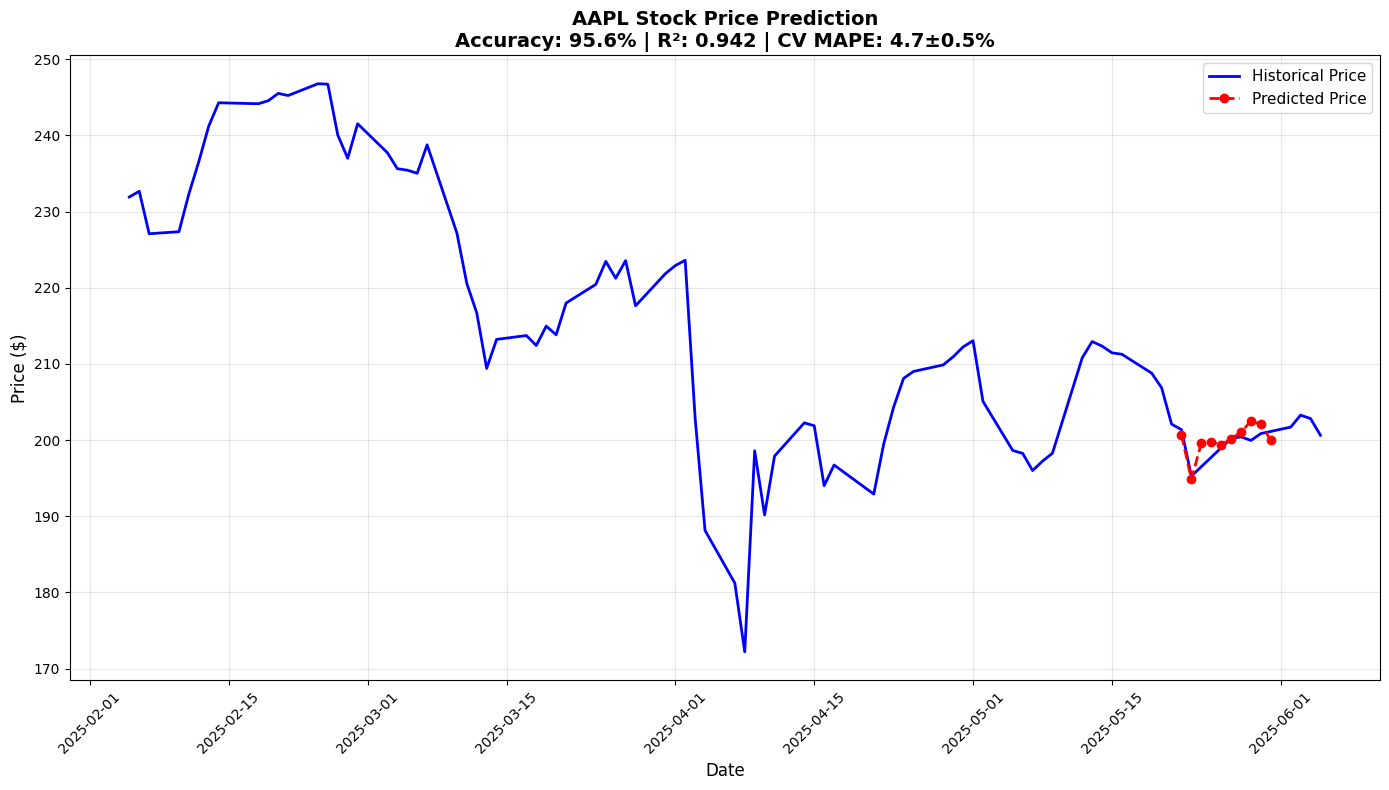

2025-06-06 09:57:19,790 - __main__ - INFO - Plot saved to stock_predictions\AAPL_prediction.png
2025-06-06 09:57:19,792 - __main__ - INFO - Downloading data for MSFT



📊 Processing MSFT...


2025-06-06 09:57:20,251 - __main__ - INFO - Successfully downloaded 1256 records for MSFT



📈 MSFT - Predicted Prices for next 10 days:
--------------------------------------------------
2025-05-22: $455.06
2025-05-23: $450.45
2025-05-24: $460.81
2025-05-25: $457.53
2025-05-26: $458.83
2025-05-27: $460.49
2025-05-28: $462.08
2025-05-29: $463.06
2025-05-30: $463.95
2025-05-31: $467.71

🎯 Model Performance:
   Training Accuracy: 96.20%
   R² Score: 0.9639
   Training MAPE: 3.80%
   Cross-Validation MAPE: 4.29±0.58%


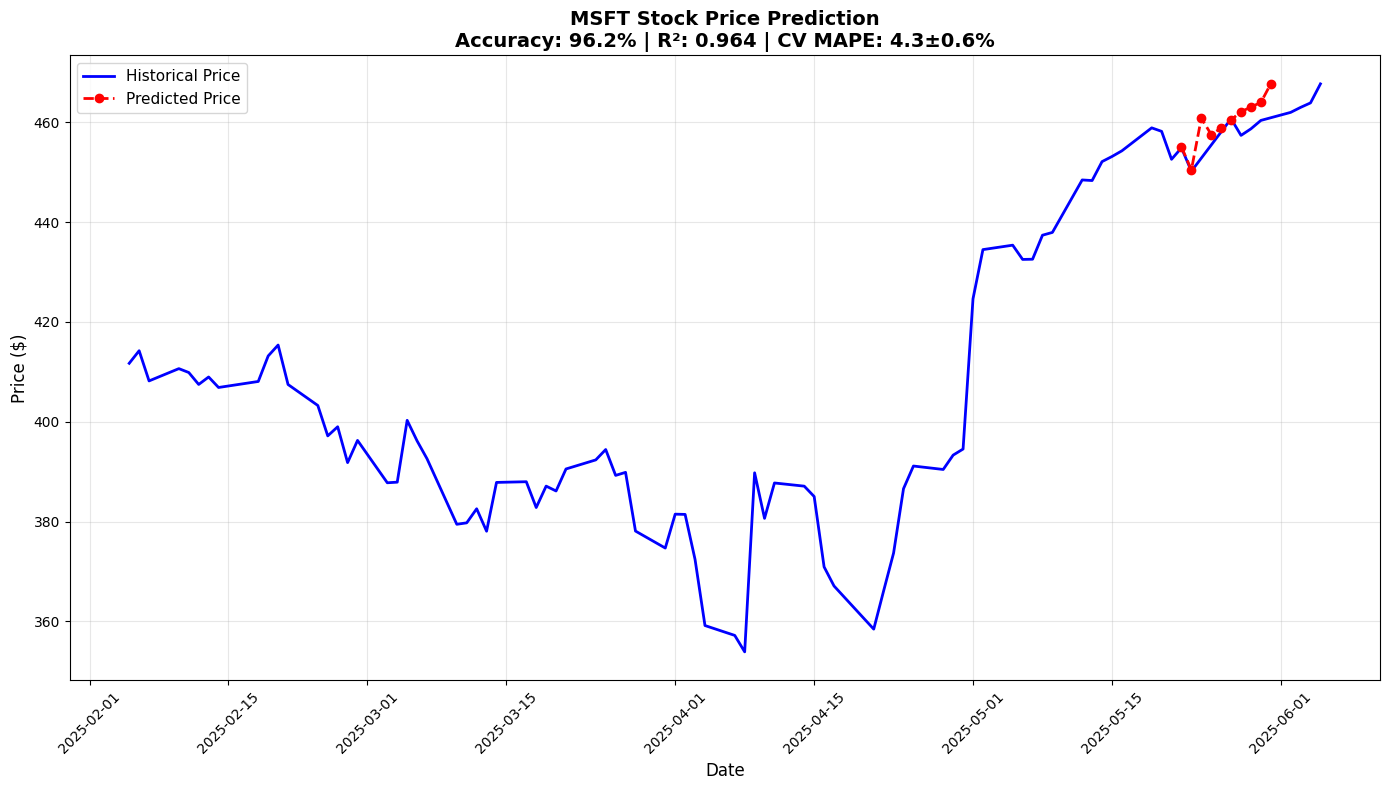

2025-06-06 09:57:22,033 - __main__ - INFO - Plot saved to stock_predictions\MSFT_prediction.png
2025-06-06 09:57:22,034 - __main__ - INFO - Downloading data for GOOGL



📊 Processing GOOGL...


2025-06-06 09:57:22,555 - __main__ - INFO - Successfully downloaded 1256 records for GOOGL



📈 GOOGL - Predicted Prices for next 10 days:
--------------------------------------------------
2025-05-22: $170.31
2025-05-23: $167.99
2025-05-24: $172.28
2025-05-25: $171.75
2025-05-26: $171.27
2025-05-27: $171.15
2025-05-28: $168.53
2025-05-29: $165.77
2025-05-30: $167.58
2025-05-31: $167.73

🎯 Model Performance:
   Training Accuracy: 95.66%
   R² Score: 0.9496
   Training MAPE: 4.34%
   Cross-Validation MAPE: 4.44±0.87%


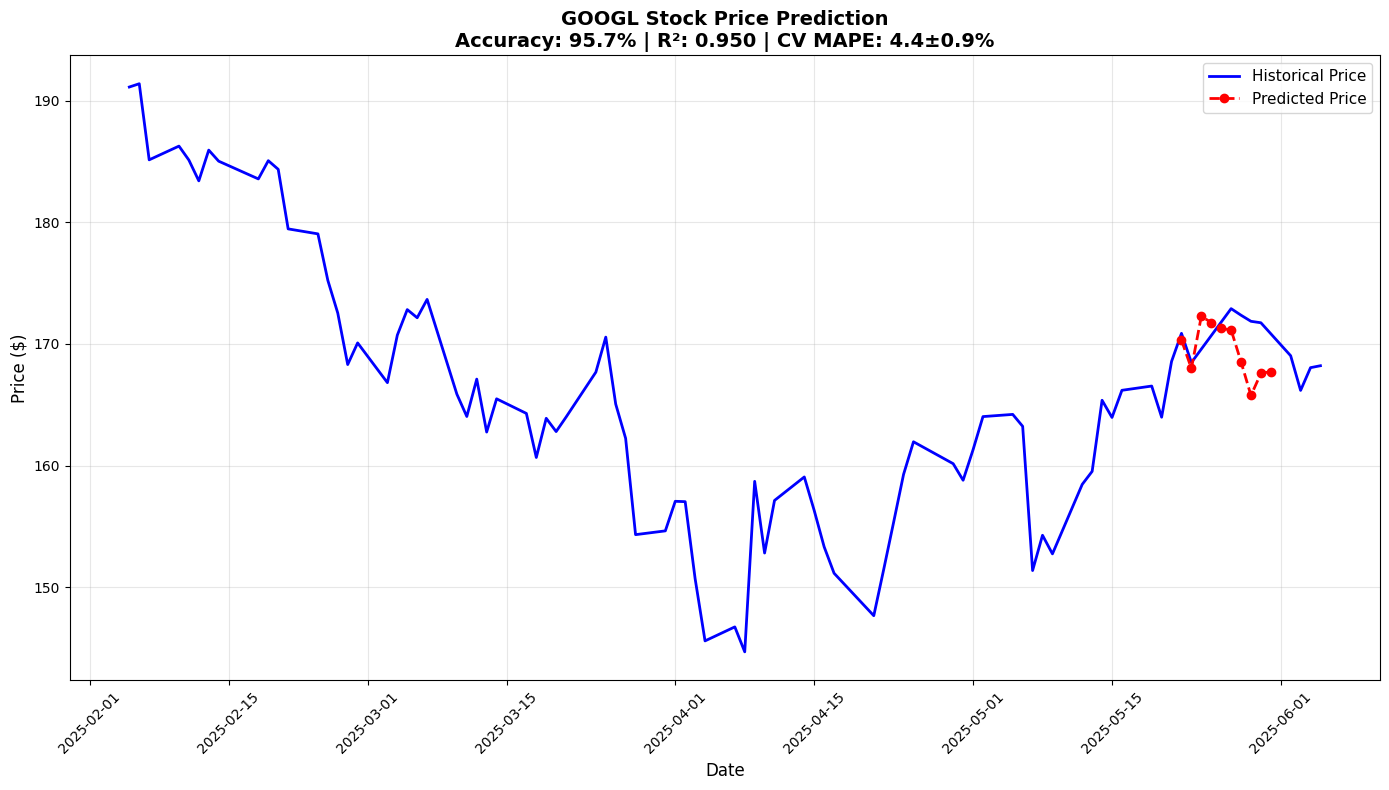

2025-06-06 09:57:24,333 - __main__ - INFO - Plot saved to stock_predictions\GOOGL_prediction.png
2025-06-06 09:57:24,335 - __main__ - INFO - Downloading data for AMZN



📊 Processing AMZN...


2025-06-06 09:57:24,855 - __main__ - INFO - Successfully downloaded 1256 records for AMZN



📈 AMZN - Predicted Prices for next 10 days:
--------------------------------------------------
2025-05-22: $201.84
2025-05-23: $199.81
2025-05-24: $204.64
2025-05-25: $203.39
2025-05-26: $204.33
2025-05-27: $203.67
2025-05-28: $205.25
2025-05-29: $204.34
2025-05-30: $205.81
2025-05-31: $206.46

🎯 Model Performance:
   Training Accuracy: 94.89%
   R² Score: 0.9116
   Training MAPE: 5.11%
   Cross-Validation MAPE: 7.33±5.57%


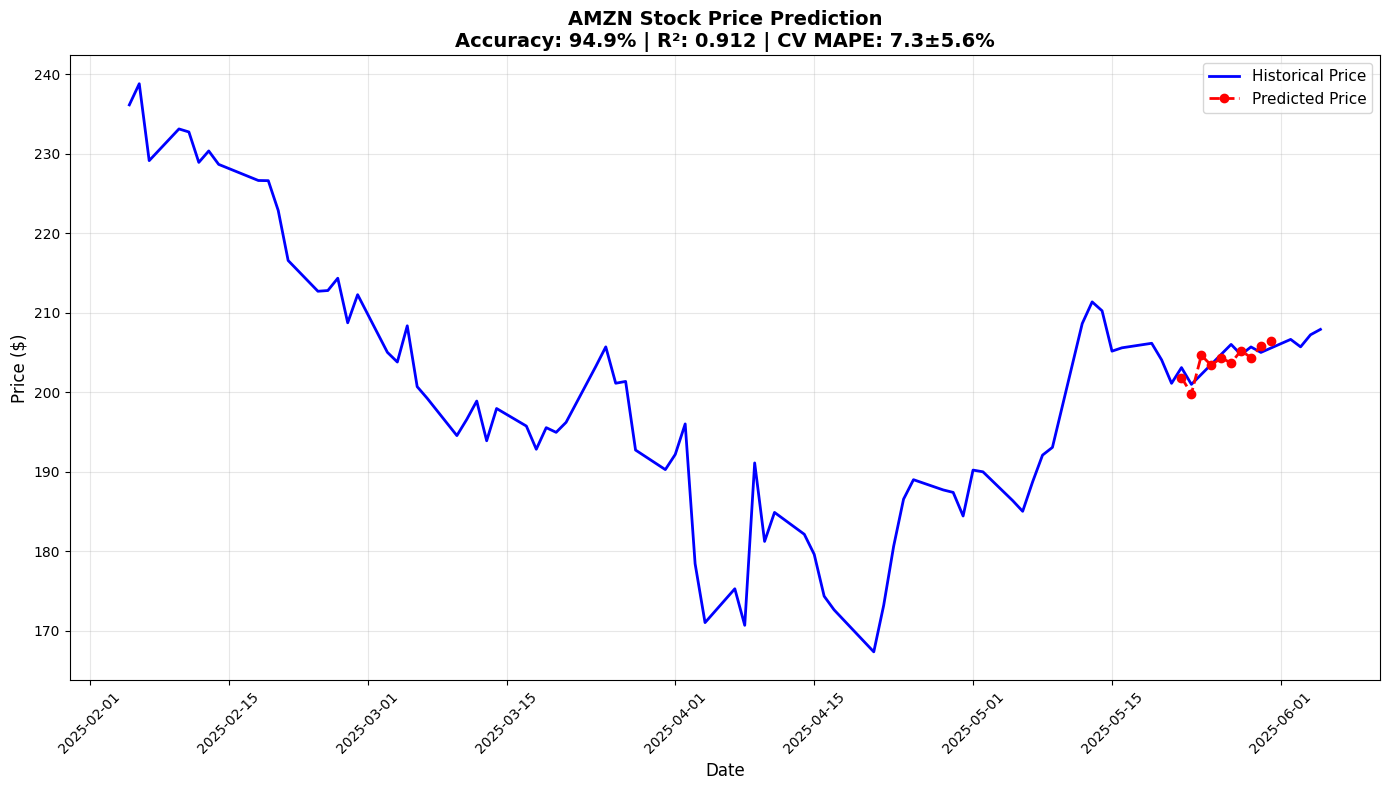

2025-06-06 09:57:26,524 - __main__ - INFO - Plot saved to stock_predictions\AMZN_prediction.png
2025-06-06 09:57:26,526 - __main__ - INFO - Downloading data for TSLA



📊 Processing TSLA...


2025-06-06 09:57:26,931 - __main__ - INFO - Successfully downloaded 1256 records for TSLA



📈 TSLA - Predicted Prices for next 10 days:
--------------------------------------------------
2025-05-22: $331.54
2025-05-23: $330.03
2025-05-24: $350.96
2025-05-25: $345.64
2025-05-26: $347.00
2025-05-27: $336.36
2025-05-28: $333.01
2025-05-29: $334.41
2025-05-30: $323.55
2025-05-31: $281.47

🎯 Model Performance:
   Training Accuracy: 89.97%
   R² Score: 0.8131
   Training MAPE: 10.03%
   Cross-Validation MAPE: 9.84±1.39%


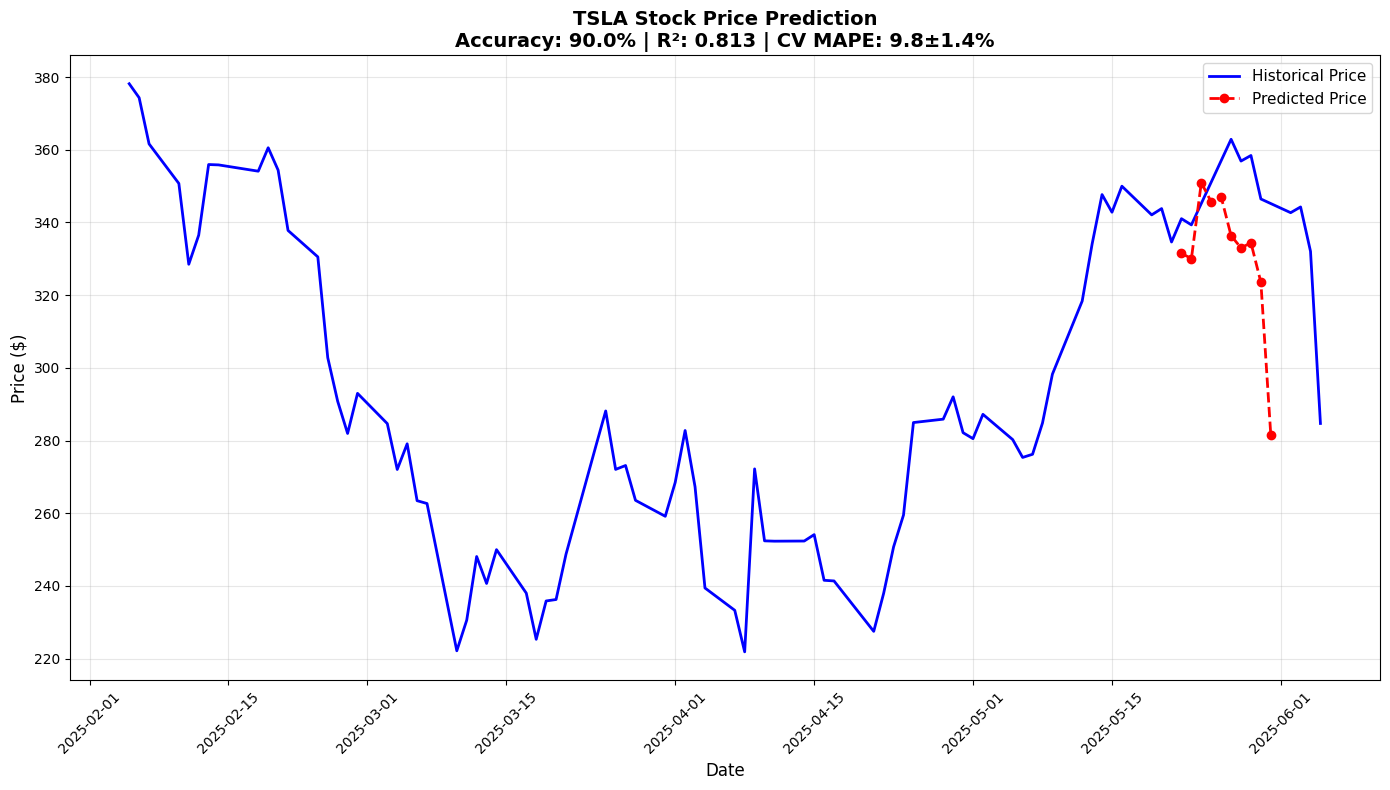

2025-06-06 09:57:28,660 - __main__ - INFO - Plot saved to stock_predictions\TSLA_prediction.png
2025-06-06 09:57:28,661 - __main__ - INFO - Completed predictions for 5/5 stocks
2025-06-06 09:57:28,667 - __main__ - INFO - Results summary saved to stock_predictions\prediction_summary.csv



PREDICTION SUMMARY
Ticker  Accuracy (%)  R² Score  MAPE (%)  CV MAPE Mean (%)  CV MAPE Std (%)  Latest Prediction ($)
  AAPL         95.64    0.9420      4.36              4.73             0.49                 199.98
  MSFT         96.20    0.9639      3.80              4.29             0.58                 467.71
 GOOGL         95.66    0.9496      4.34              4.44             0.87                 167.73
  AMZN         94.89    0.9116      5.11              7.33             5.57                 206.46
  TSLA         89.97    0.8131     10.03              9.84             1.39                 281.47

✅ Prediction pipeline completed successfully!
📁 Results saved to: stock_predictions/


In [22]:
"""
Industrial-grade stock price prediction system.

This module provides a robust framework for downloading stock data,
training prediction models, and generating forecasts with proper
error handling and logging.
"""




def main():
    """Main entry point for the stock prediction system."""
    
    # Configuration
    config = PredictionConfig(
        stocks=['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA'],
        training_years=5,
        forecast_days=10,
        validation_splits=5,
        plot_months=4,
        output_dir="stock_predictions",
        log_level="INFO"
    )
    
    # Run predictions
    system = StockPredictionSystem(config)
    results = system.run_predictions()
    
    print(f"\n✅ Prediction pipeline completed successfully!")
    print(f"📁 Results saved to: {config.output_dir}/")


if __name__ == "__main__":
    main()

In [23]:
df.describe()  # Ensure DataFrame is not empty

NameError: name 'df' is not defined

Something something etc 